In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [0]:
dataset = load_boston()

In [0]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [0]:
df['TARGET'] = dataset.target

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
print(df.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
TARGET     float64
dtype: object


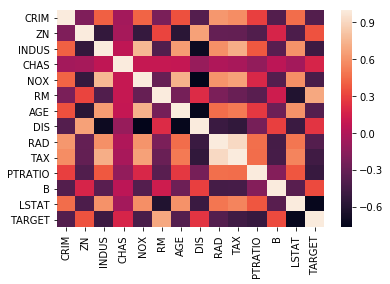

In [7]:
sns.heatmap(df.corr('pearson'))
plt.show()

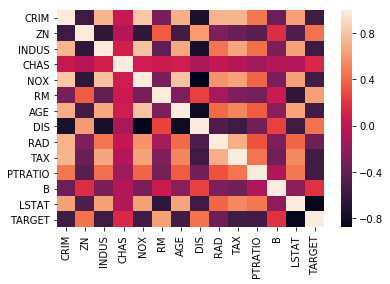

In [8]:
sns.heatmap(df.corr('spearman'))
plt.show()

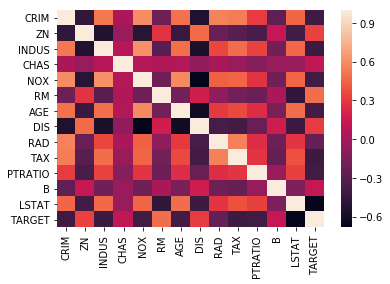

In [9]:
sns.heatmap(df.corr('kendall'))
plt.show()

In [0]:
sns.set(color_codes=True)

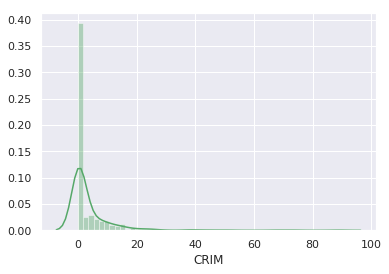

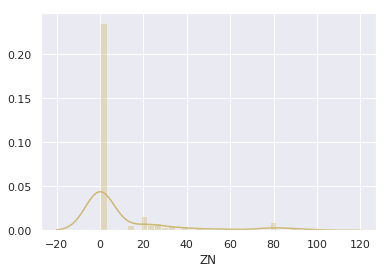

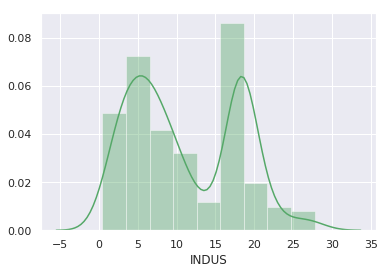

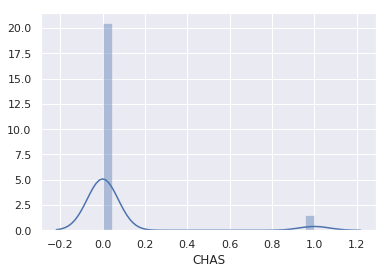

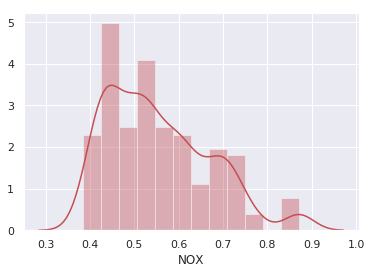

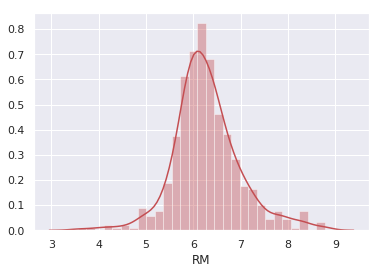

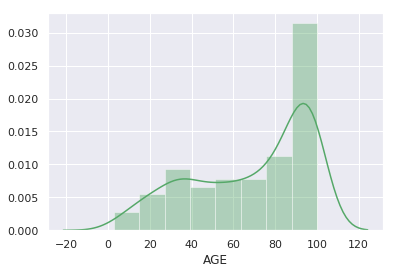

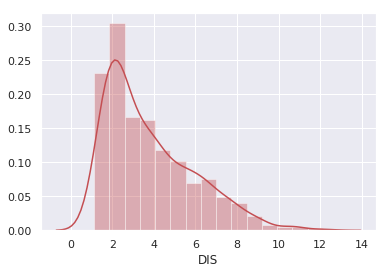

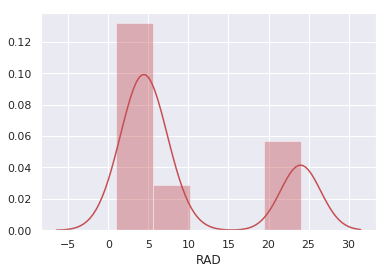

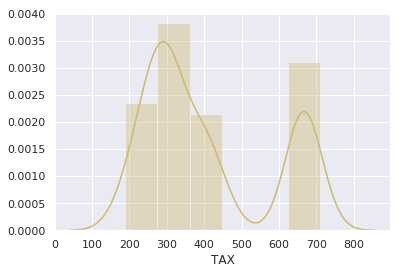

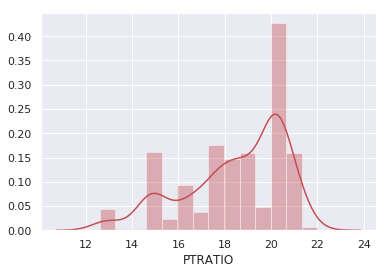

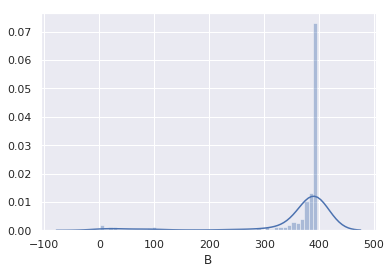

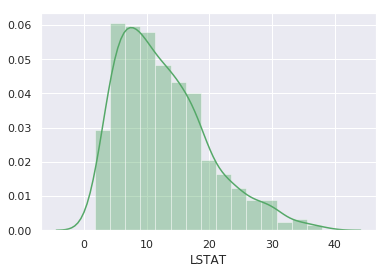

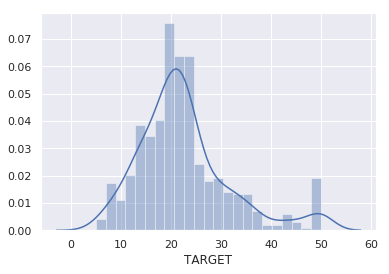

In [11]:
colors = ['r', 'g', 'b', 'y']

for col in df.columns:
  sns.distplot(df[col], color=np.random.choice(colors))
  plt.show()

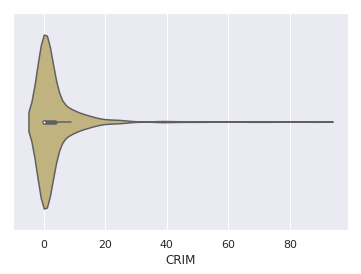

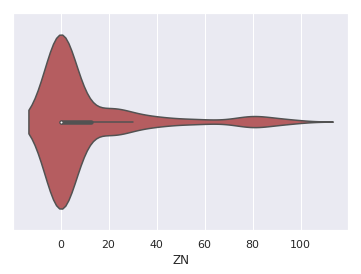

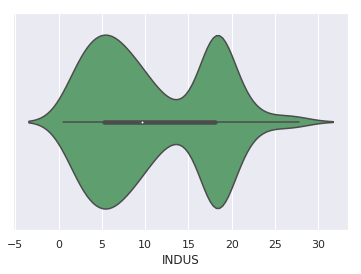

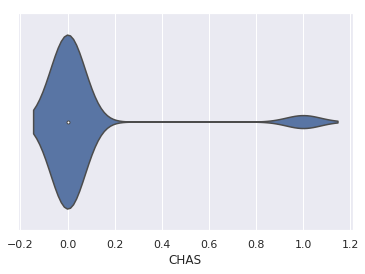

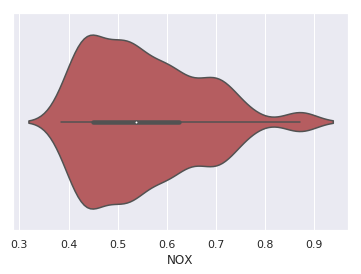

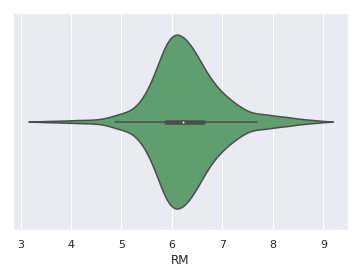

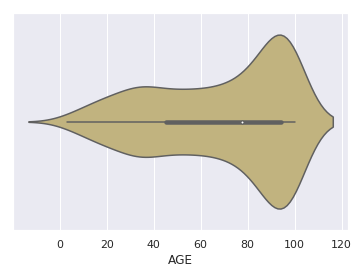

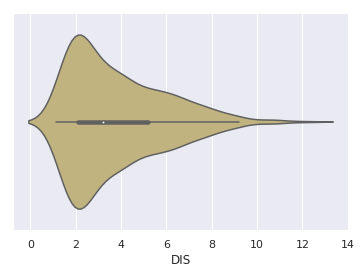

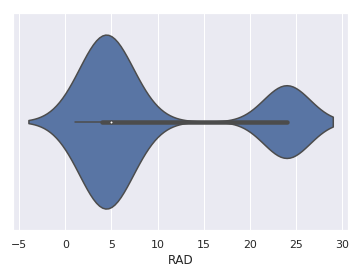

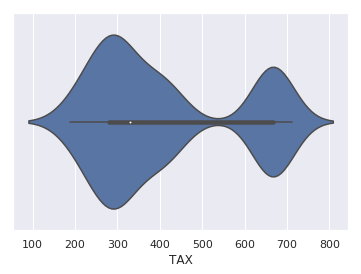

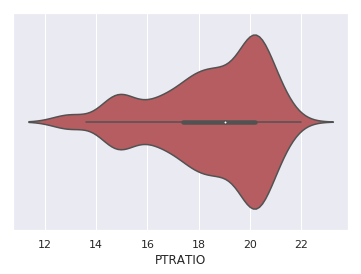

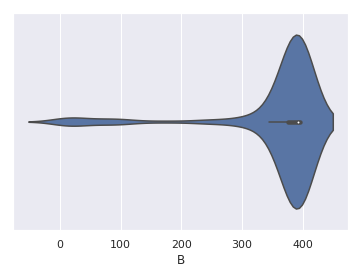

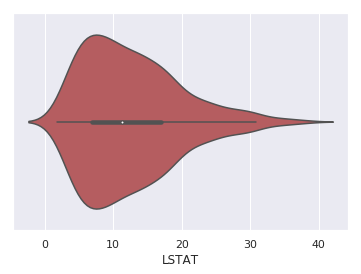

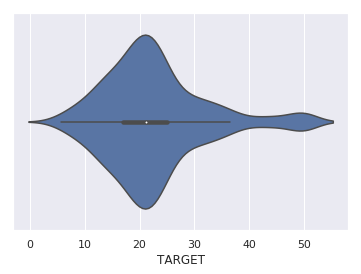

In [12]:
for col in df.columns:
  sns.violinplot(df[col], color=np.random.choice(colors))
  plt.show()

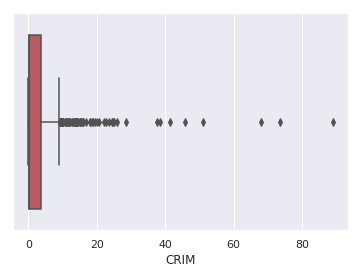

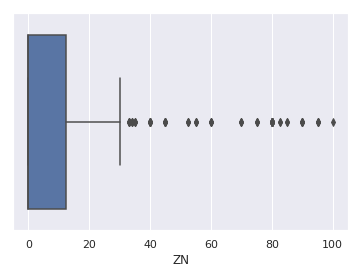

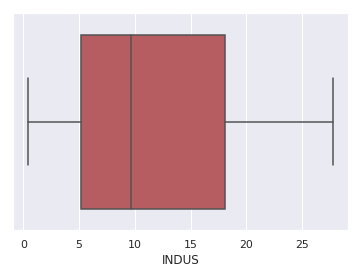

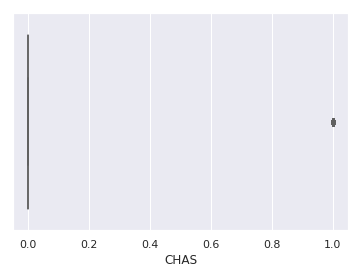

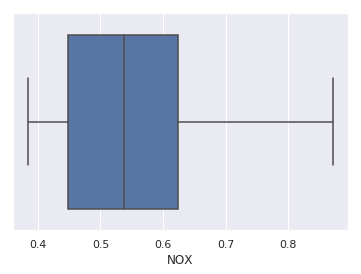

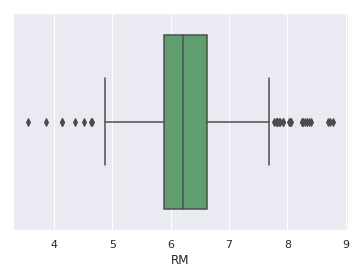

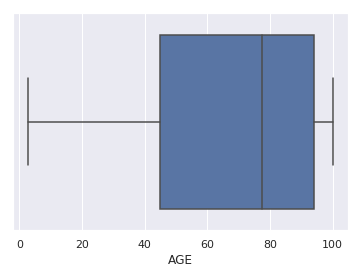

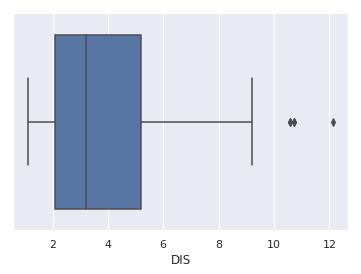

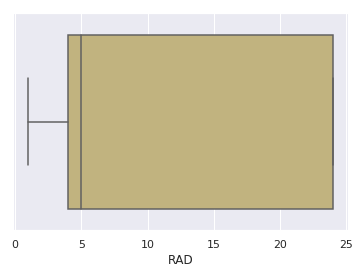

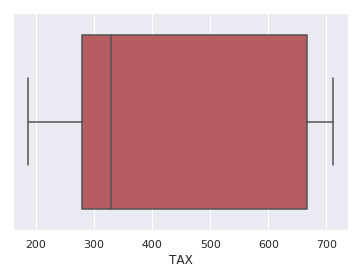

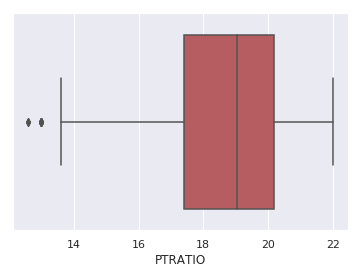

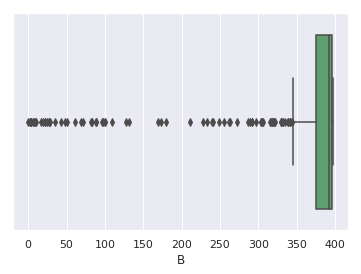

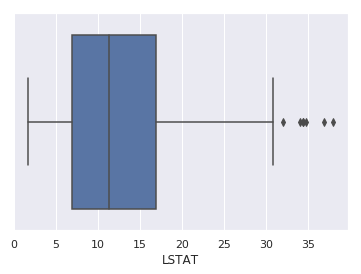

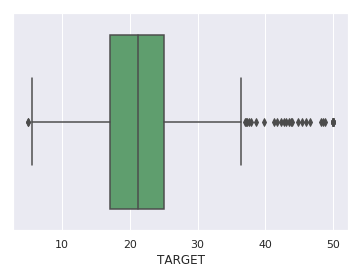

In [13]:
for col in df.columns:
  sns.boxplot(df[col], color=np.random.choice(colors))
  plt.show()

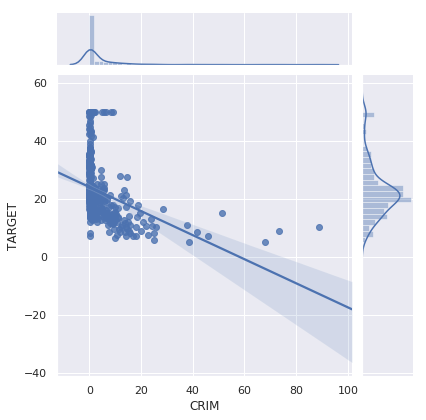

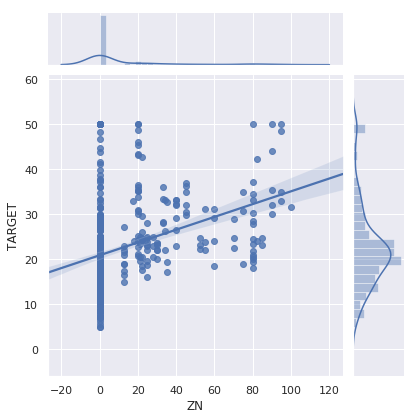

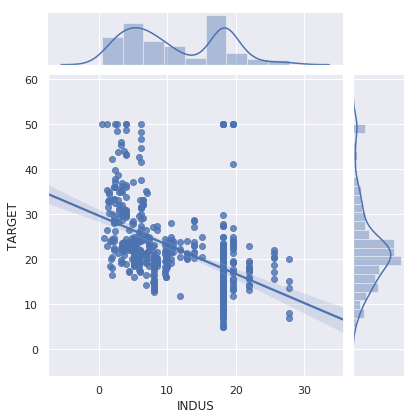

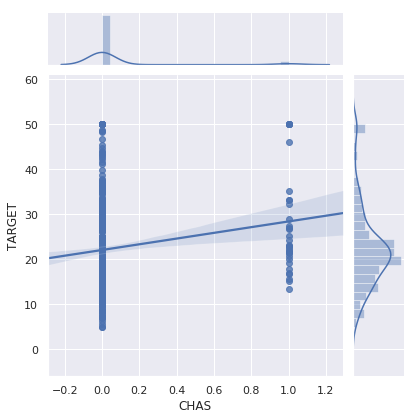

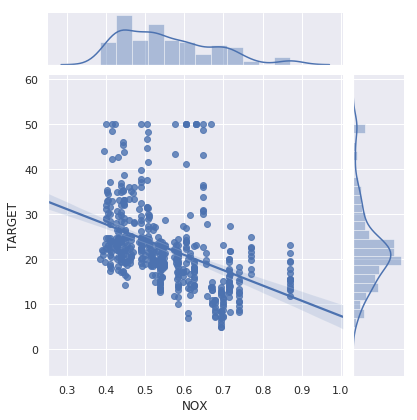

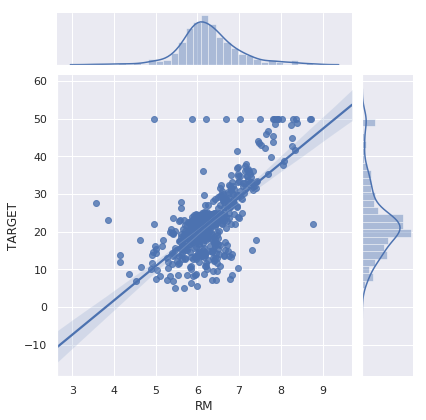

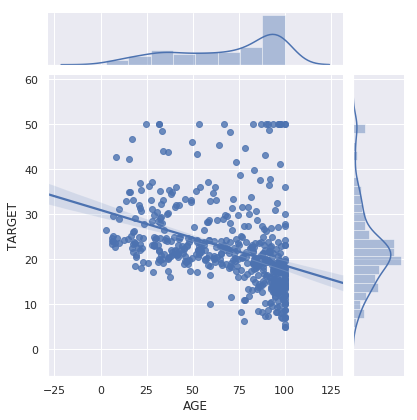

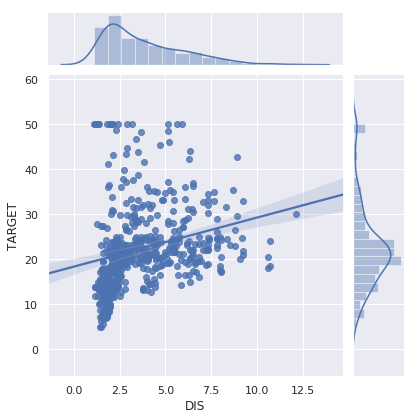

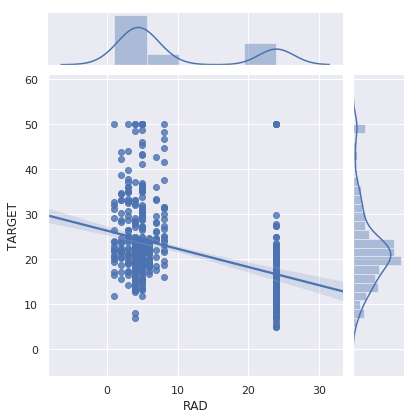

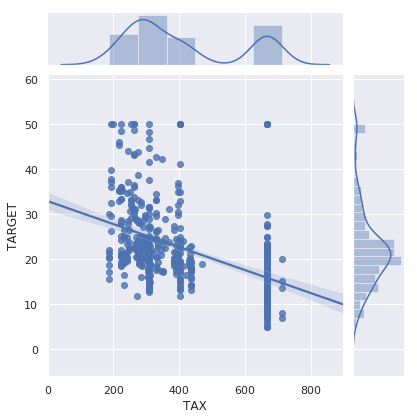

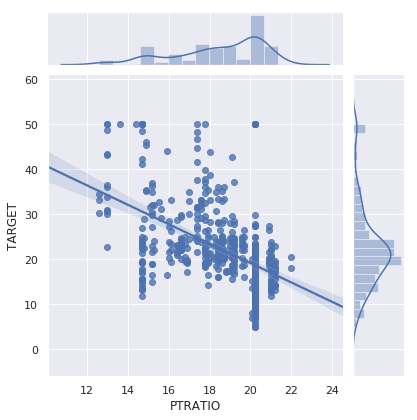

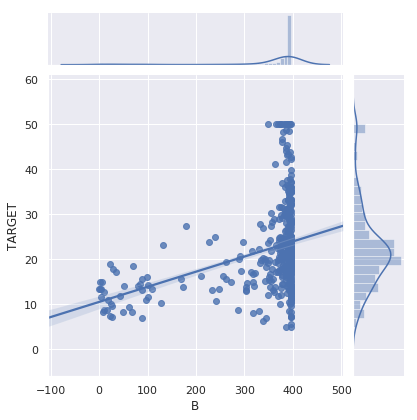

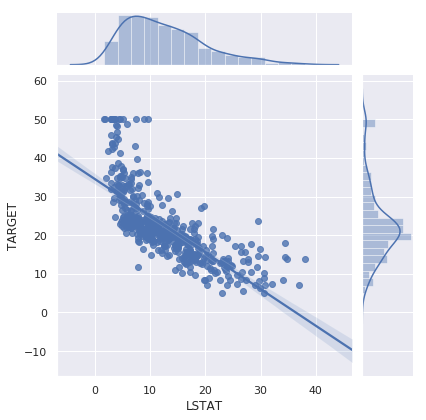

In [14]:
for col in df.columns:
  if col == 'TARGET':
    continue
    
  sns.jointplot(x=col, y='TARGET', data=df, kind='reg')
  plt.show()

In [15]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64

In [16]:
def print_null_info(df, mask):
  print('Numero de valores nulos')
  print(df.isnull().sum())
  print('Proporcao de valores nulos')
  print(df.isnull().sum() / len(df))
  
  print('Valores')
  print(df[mask].head(10))
  
df_null = df[['AGE']]
mask = np.random.choice([True, False], size=df_null.shape, p=[.1, .9])
df_null = df_null.mask(mask)
print_null_info(df_null, mask)

Numero de valores nulos
AGE    49
dtype: int64
Proporcao de valores nulos
AGE    0.096838
dtype: float64
Valores
     AGE
14   NaN
19   NaN
25   NaN
28   NaN
39   NaN
51   NaN
60   NaN
122  NaN
125  NaN
141  NaN


In [0]:
from sklearn.impute import SimpleImputer

In [0]:
def impute(df, strategy, fill_value=None):
  df_clean = df.copy()
  imp = SimpleImputer(missing_values=np.nan, strategy=strategy, fill_value=fill_value)
  df_clean.loc[:, "AGE"] = imp.fit_transform(df_null)
  
  return df_clean

In [19]:
strategies = ['median', 'most_frequent', 'mean']
for strategy in strategies:
  df_clean = impute(df_null, strategy)
  print_null_info(df_clean, mask)
  
df_clean = impute(df_null, 'constant', 100)
print_null_info(df_clean, mask)

Numero de valores nulos
AGE    0
dtype: int64
Proporcao de valores nulos
AGE    0.0
dtype: float64
Valores
      AGE
14   78.1
19   78.1
25   78.1
28   78.1
39   78.1
51   78.1
60   78.1
122  78.1
125  78.1
141  78.1
Numero de valores nulos
AGE    0
dtype: int64
Proporcao de valores nulos
AGE    0.0
dtype: float64
Valores
       AGE
14   100.0
19   100.0
25   100.0
28   100.0
39   100.0
51   100.0
60   100.0
122  100.0
125  100.0
141  100.0
Numero de valores nulos
AGE    0
dtype: int64
Proporcao de valores nulos
AGE    0.0
dtype: float64
Valores
           AGE
14   68.689934
19   68.689934
25   68.689934
28   68.689934
39   68.689934
51   68.689934
60   68.689934
122  68.689934
125  68.689934
141  68.689934
Numero de valores nulos
AGE    0
dtype: int64
Proporcao de valores nulos
AGE    0.0
dtype: float64
Valores
       AGE
14   100.0
19   100.0
25   100.0
28   100.0
39   100.0
51   100.0
60   100.0
122  100.0
125  100.0
141  100.0


In [20]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [0]:
from scipy import stats
df_rm = df[['RM']].copy()
z = np.abs(stats.zscore(df_rm))
z = np.abs(stats.zscore(df_rm))
df_clean = df_rm[(z < 3).all(axis=1)]


In [23]:
df_clean.describe()

,RM
count,498.000000
mean,6.284574
std,0.641150
min,4.368000
25%,5.888000
50%,6.208500
75%,6.617500
max,8.375000


In [0]:
def iqr_removal(df):
  X = df
  Q1 = X.quantile(0.25)
  Q3 = X.quantile(0.75)
  IQR = Q3 - Q1
  df = df[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
  
  return df

In [0]:
df_clean = iqr_removal(df[['RM', 'LSTAT']])

In [26]:
df_clean.describe()

,RM,LSTAT
count,472.000000,472.000000
mean,6.241841,12.636250
std,0.526080,6.500437
min,4.880000,1.730000
25%,5.888000,7.420000
50%,6.189000,11.645000
75%,6.557750,16.910000
max,7.691000,30.810000


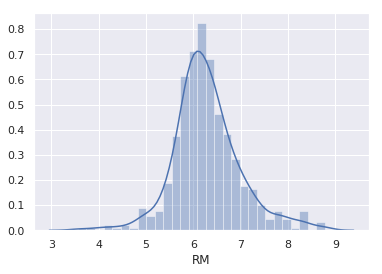

In [27]:
sns.distplot(df['RM'])

In [28]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


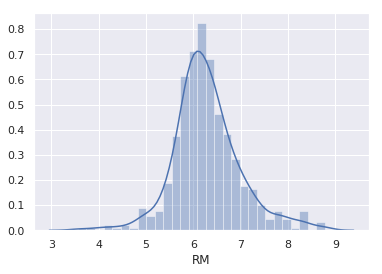

In [29]:
sns.distplot(df['RM'])

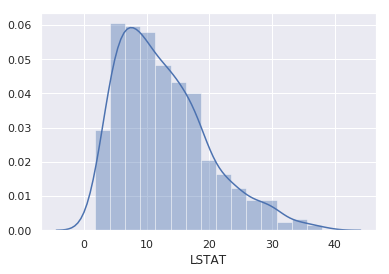

In [30]:
sns.distplot(df['LSTAT'])

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

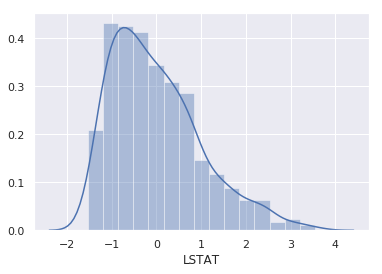

In [33]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
sns.distplot(df_scaled['LSTAT'])

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler_2 = MinMaxScaler()
df_scaled2 = scaler.fit_transform(df[['LSTAT']])

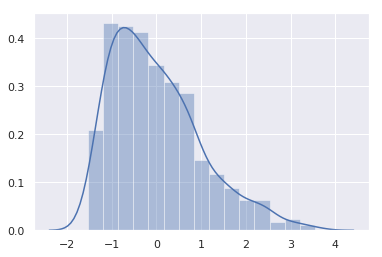

In [35]:
sns.distplot(df_scaled2)

In [0]:
from sklearn.preprocessing import KBinsDiscretizer
disc = KBinsDiscretizer(n_bins=10, encode='ordinal')

In [37]:
pd.DataFrame(disc.fit_transform(df[['INDUS']])).head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


,0
0,0.0
1,3.0
2,3.0
3,0.0
4,0.0


In [38]:
df[['INDUS']].head()

,INDUS
0,2.31
1,7.07
2,7.07
3,2.18
4,2.18


In [39]:
df_disc = pd.DataFrame(disc.fit_transform(df[['INDUS']]))
np.unique(df_disc.values)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


array([0., 1., 2., 3., 4., 5., 6., 7., 8.])